Importing Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Loading iris dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

Converting data into Dataframe

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Independant and Dependant Variables

In [ ]:
X = df.drop('species',axis = 1)
Y = df['species']

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape

(150, 4)

In [ ]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
Y.shape

(150,)

Splitting Data into Train and Test data

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.25, random_state = 0)

Scaling the Values

In [ ]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

Checking Null Values

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Scatterplot between Sepal length and Sepal width

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

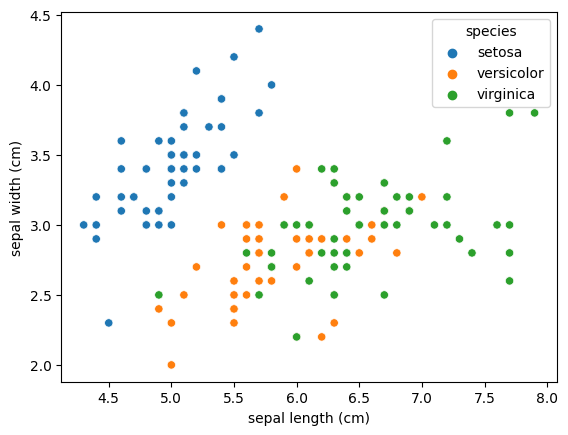

In [ ]:
sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)',hue = 'species')

Scatterplot between Petal length and Petal width

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

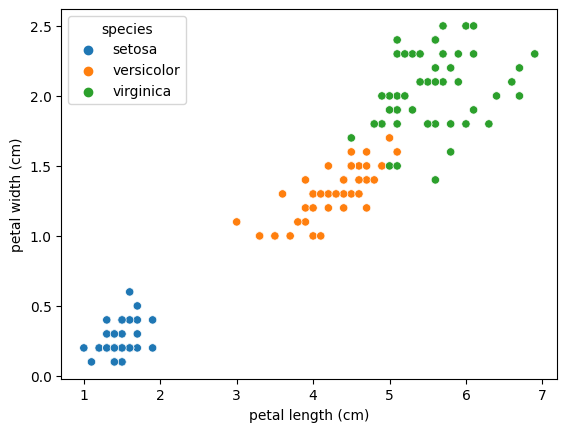

In [ ]:
sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)',hue = 'species')

Pairplot

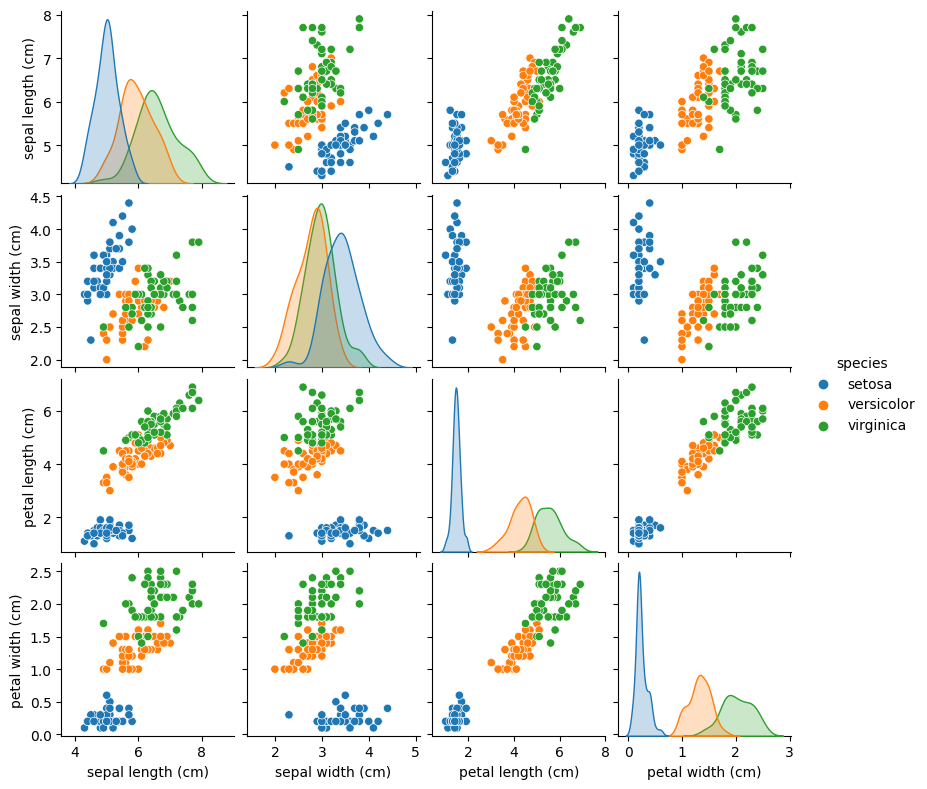

In [ ]:
sns.pairplot(df, height = 2, hue = 'species')

histogram of sepal length

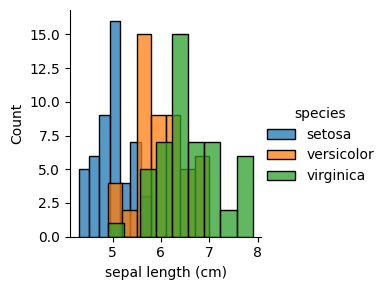

In [ ]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "sepal length (cm)").add_legend()
plt.show()

histogram of sepal width

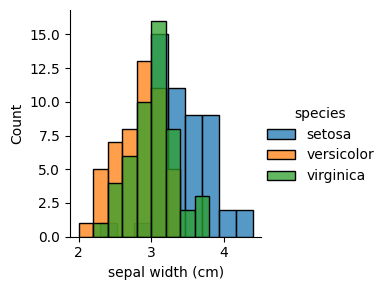

In [ ]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "sepal width (cm)").add_legend()
plt.show()

hsitogram of petal length

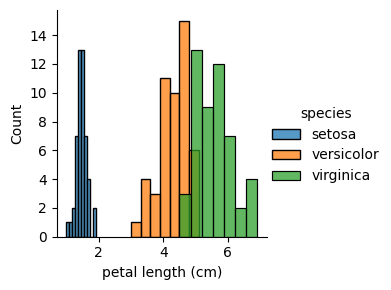

In [ ]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "petal length (cm)").add_legend()
plt.show()

histogram of petal width

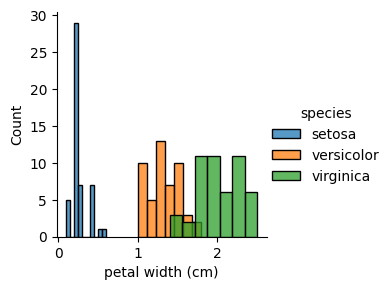

In [ ]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "petal width (cm)").add_legend()
plt.show()

KNN Model

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

KNN Model Training

In [ ]:
model.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

Prediction using Model

In [ ]:
Ypred = model.predict(Xtest)
print(np.concatenate((Ypred.reshape(len(Ypred), 1), Ytest.values.reshape(len(Ytest), 1)), axis=1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'versicolor']]


Accuracy and Confusion Matrix of KNN Model

In [ ]:
cm = confusion_matrix(Ytest, Ypred)
print('Confusion Matrix: \n',cm)
print('Accuracy of the model is {0}'.format(accuracy_score(Ytest, Ypred)*100))

Confusion Matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy of the model is 97.36842105263158


Prediction of Species using Sepal and Petal values by KNN

In [ ]:
sepal_length = float(input("Sepal Length: "))
sepal_width = float(input("Sepal Width: "))
petal_length = float(input("Petal Length: "))
petal_width = float(input("Petal Width: "))
newSp = [[sepal_length,sepal_width,petal_length,petal_width]]
result = model.predict(sc.transform(newSp))
print("The predicted iris species is ",result)

Sepal Length: 4.6
Sepal Width: 3.5
Petal Length: 1.5
Petal Width: 0.2
The predicted iris species is  ['setosa']


Decision Tree Classifier

In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

Decision Tree Model Training

In [ ]:
model2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Prediction Using Model 2

In [ ]:
Ypred2 = model2.predict(Xtest)
print(np.concatenate((Ypred2.reshape(len(Ypred2),1), Ytest.values.reshape(len(Ytest),1)),axis = 1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'versicolor']]


Accuracy and Confusion Matrix using Decision Tree Model

In [ ]:
print("Accuracy of the model {0}".format(accuracy_score(Ytest,Ypred2)*100))
print("Confusion Matrix: ",confusion_matrix(Ytest, Ypred2))

Accuracy of the model 97.36842105263158
Confusion Matrix:  [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Prediction of Species using Petal and Sepal Values

In [ ]:
sepal2_length = float(input("Sepal 2 Length: "))
sepal2_width = float(input("Sepal 2 Width: "))
petal2_length = float(input("Petal 2 Length: "))
petal2_width = float(input("Petal 2 Width: "))
newSp2 = [[sepal2_length, sepal2_width, petal2_length, petal2_width]]
result2 = model2.predict(sc.transform(newSp2))
print("The predicted iris species is ",result2)

Sepal 2 Length: 6.5
Sepal 2 Width: 3.0
Petal 2 Length: 5.3
Petal 2 Width: 2.0
The predicted iris species is  ['virginica']
